# Practicing plotting

Let's put together some of the you've worked on. There is a file called `data/cepheid.txt`, which contains flux measurements from a variable star over time. In this notebook, your task will be to reproduce some plots. **Bold text** makes clear what your task is in each cell. 

We have used the function `ascii.read` to read in data before (see `06-plotting.ipynb` for example). **Use `ascii.read` to load the file `data/cepheid.txt` into a variable `data_table`**:

In [17]:
from astropy.io import ascii

data_table = ascii.read('data/cepheid.txt')

This data table has a column called `Time` which tells you the time of each brightness measurement (units of days) and a column called `Red` and `Blue` which tells you the flux of the star through two filters. 

**Plot the red fluxes as a function of time and reproduce this plot using `matplotlib`**. Don't forget to import `matplotlib` and to use the `%matplotlib inline` magic function within the notebook:

![](files/data/example_plot_1.png)

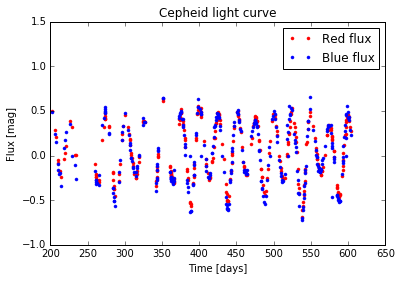

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(data_table['Time'], data_table['Red'], 'r.', label='Red flux')
plt.plot(data_table['Time'], data_table['Blue'], 'b.', label='Blue flux')
plt.ylabel('Flux [mag]')
plt.xlabel('Time [days]')
plt.title('Cepheid light curve')
plt.legend()
plt.savefig('data/example_plot_1.png')
plt.show()

This type of star is called a [Cepheid variable star](https://en.wikipedia.org/wiki/Classical_Cepheid_variable#Period-luminosity_relation). These stars are useful to astronomers because their flux varies in a predictable sinusoidal pattern. It turns out that the period of the flux oscillation is directly related to how intrinsically bright the star is – so if you know how long the period is, and you measure how dim the star _appears_ to be, you can estimate how far away it is because you know how bright it really is.

In the cell below, roughly **measure the period of this Cepheid** by plotting a sinusoidal function over the data. The function that you should play with is: 

$$\textrm{flux} = \textrm{amplitude} \times \sin \left( \frac{2\pi}{\textrm{period}} \left( \textrm{time} - \textrm{offset} \right) \right)$$

Hint: start with an `offset` of zero and a period somewhere between 24 and 25 days, and remember that the `sin` function is within numpy.

![](files/data/example_plot_2.png)



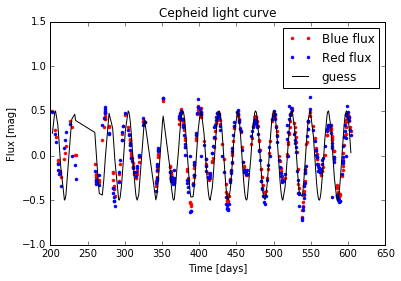

In [55]:
import numpy as np
star_period = 24.45
guess = 0.5 * np.sin(2*np.pi/star_period * (data_table['Time'] - 5))

plt.plot(data_table['Time'], data_table['Red'], 'r.', label='Blue flux')
plt.plot(data_table['Time'], data_table['Blue'], 'b.', label='Red flux')
plt.plot(data_table['Time'], guess, color='k', label='guess')
plt.ylabel('Flux [mag]')
plt.xlabel('Time [days]')
plt.title('Cepheid light curve')
plt.legend()
plt.savefig('data/example_plot_2.png')
plt.show()

The brightness of this Cepheid variable star is related to its period by the _period-luminosity relation_: 

$$ M_{v}=-2.43 \left(\log _{{10}}( \textrm{period})-1\right) - 4.05 $$

where $M_v$ is the [_absolute magnitude_](https://en.wikipedia.org/wiki/Absolute_magnitude) of the star. Note that brighter stars have more negative absolute magnitudes. **Write a function** called `period_to_absolute_magnitude` which takes the period as the argument, and returns the absolute magnitude. 

**Create a range of periods and plot the corresponding absolute magnitudes using your function, in order to reproduce this plot: **

![](files/data/example_plot_3.png)

/Users/bmmorris/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


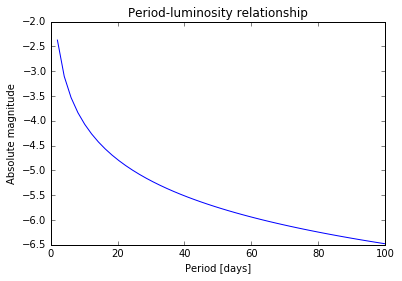

In [37]:
def period_to_absolute_magnitude(period): 
    return -2.43 * (np.log10(period) - 1) - 4.05

periods = np.linspace(0, 100)
mags = period_to_absolute_magnitude(periods)

plt.plot(periods, mags)
plt.xlabel('Period [days]')
plt.ylabel('Absolute magnitude')
plt.title('Period-luminosity relationship')
plt.savefig('data/example_plot_3.png')

Use your function from above to **calculate the absolute magnitude of the star** in the data, and **add a point for the star to the plot**:

![](files/data/example_plot_4.png)

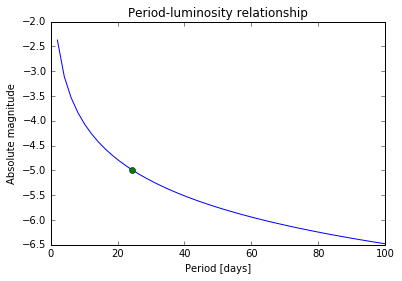

In [40]:
star_mag = period_to_absolute_magnitude(star_period)

plt.plot(periods, mags)
plt.plot(star_period, star_mag, 'o')
plt.xlabel('Period [days]')
plt.ylabel('Absolute magnitude')
plt.title('Period-luminosity relationship')
plt.savefig('data/example_plot_4.png')

To get the distance to the star, we need to use one more equation, which calculates the distance $d$ in parsecs to a star given its absolute magnitude $M$ and its apparent magnitude $m$: 

$$ M = m - 5 (\log_{10}{d} - 1) $$

or 

$$ 100 ^{\left(\frac{1 + \frac{m - M}{5}}{2}\right)}$$

If the apparent magnitude of this star is $m = 10$, **calcuate the distance to the star using your absolute magnitude calculated above.**

In [53]:
m = 4
M = star_mag

distance = 100 ** ((1 + (m - M)/5)/2)

print(distance, 'parsecs')

629.076595324 parsecs
